<a href="https://colab.research.google.com/github/Jatinnagar777/demo/blob/main/feedforward_nn_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split

In [37]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [38]:
x = df[df.columns[:-1]].values
y = df[df.columns[-1]].values

In [39]:
scaler = StandardScaler()
x = scaler.fit_transform(x)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)

In [40]:
over = RandomOverSampler()
x, y = over.fit_resample(x, y)
data = np.hstack((x, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data, columns=df.columns)
len(transformed_df[transformed_df['Outcome']==1]), len(transformed_df[transformed_df['Outcome']==1])

(500, 500)

#Data Visualization

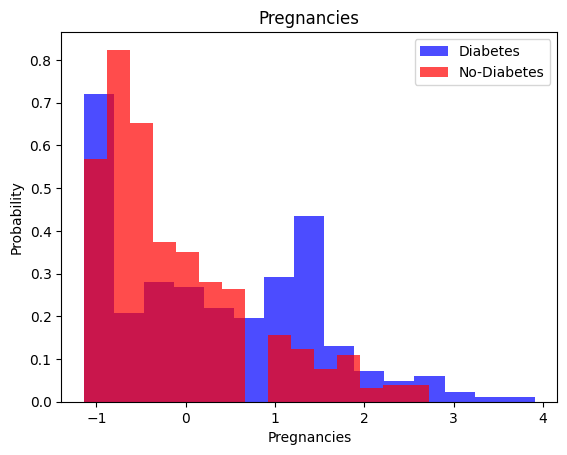

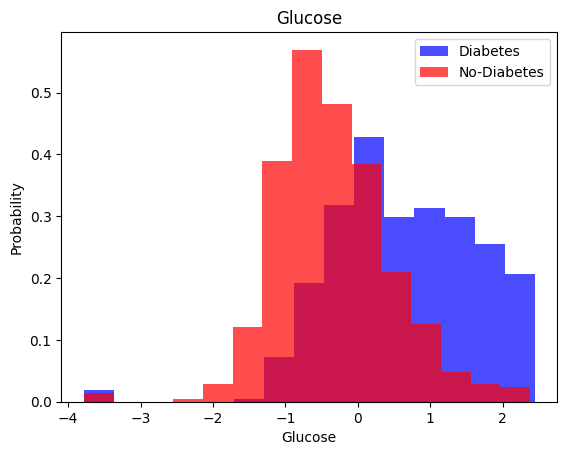

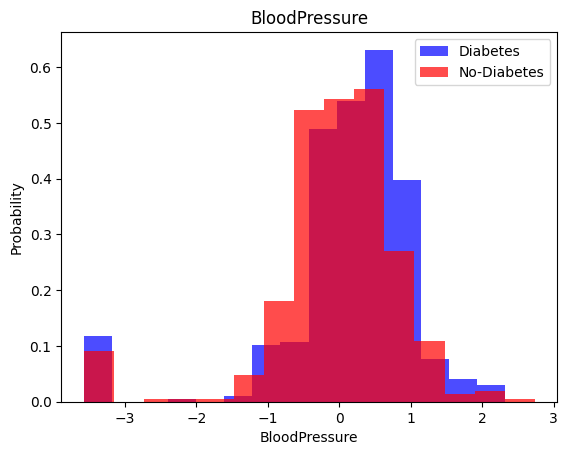

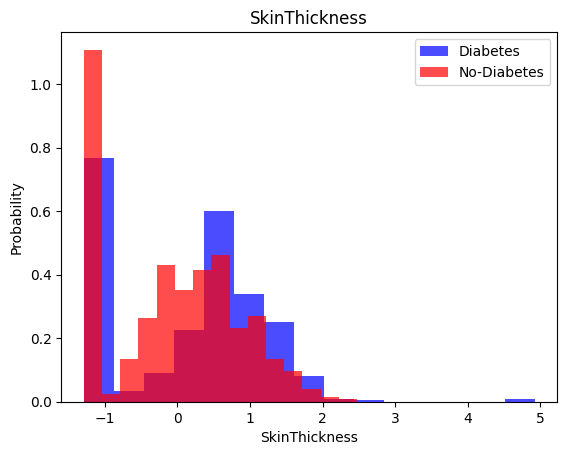

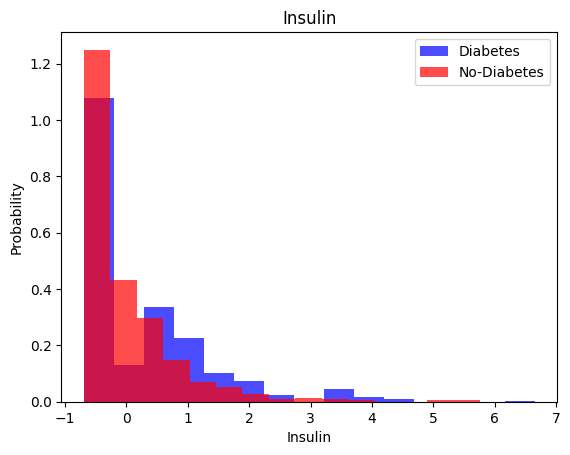

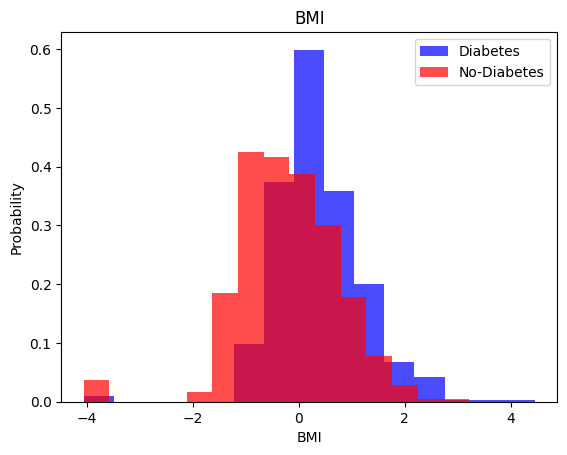

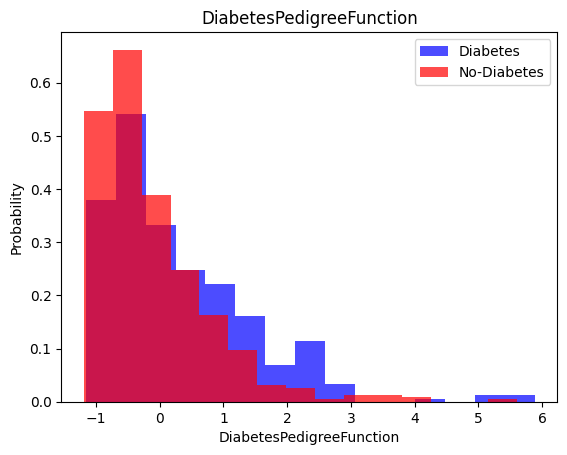

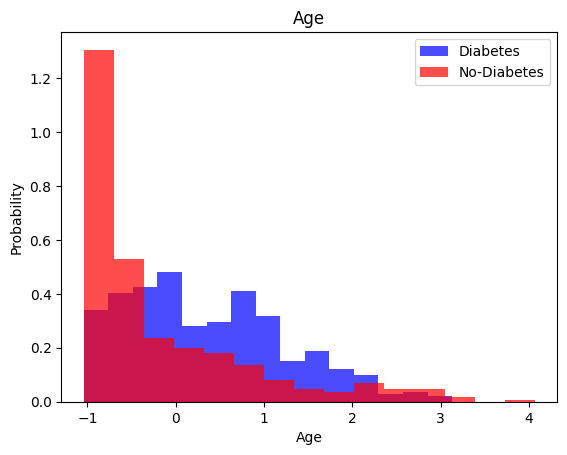

In [41]:
for column in df.columns[:-1]:
  plt.hist(transformed_df[transformed_df['Outcome']==1][column], label='Diabetes', color='blue', alpha = 0.7, density=True, bins=15)
  plt.hist(transformed_df[transformed_df['Outcome']==0][column], label='No-Diabetes', color='red', alpha = 0.7, density=True, bins=15)
  plt.title(column)
  plt.xlabel(column)
  plt.ylabel('Probability')
  plt.legend()
  plt.show()

In [42]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, test_size=0.4, random_state=0)
x_valid, x_test, y_valid, y_test = train_test_split(x_temp, y_temp, test_size=0.5, random_state=0)

#Neural Network

In [43]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])

In [45]:
model.evaluate(x_train, y_train)

19/19 [==============================] - 0s 2ms/step - loss: 0.6580 - accuracy: 0.6250


[0.6580003499984741, 0.625]

In [46]:
model.evaluate(x_valid, y_valid)

7/7 [==============================] - 0s 3ms/step - loss: 0.6711 - accuracy: 0.6050


[0.6711052060127258, 0.6050000190734863]

In [47]:
model.fit(x_train, y_train, batch_size=16, epochs=20, validation_data=(x_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 1s 4ms/step - loss: 0.6327 - accuracy: 0.6717 - val_loss: 0.6125 - val_accuracy: 0.7300
Epoch 2/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5870 - accuracy: 0.7233 - val_loss: 0.5714 - val_accuracy: 0.7400
Epoch 3/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5533 - accuracy: 0.7267 - val_loss: 0.5404 - val_accuracy: 0.7600
Epoch 4/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5307 - accuracy: 0.7383 - val_loss: 0.5171 - val_accuracy: 0.7450
Epoch 5/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5144 - accuracy: 0.7350 - val_loss: 0.4995 - val_accuracy: 0.7550
Epoch 6/20
38/38 [==============================] - 0s 3ms/step - loss: 0.5020 - accuracy: 0.7467 - val_loss: 0.4900 - val_accuracy: 0.7950
Epoch 7/20
38/38 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7483 - val_loss: 0.4794 - val_accuracy: 0.8000
Epoch 8/20
38/38 [==

In [48]:
model.evaluate(x_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.4591 - accuracy: 0.8000


[0.45906001329421997, 0.800000011920929]